# 線形モデル

In [1]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

w[0]: 0.393906  b: -0.031804


## 線形回帰（通常最小二乗法）

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# データセット
X, y = mglearn.datasets.make_wave(n_samples = 60)
# 訓練データ、テストデータ生成
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# 線形回帰モデルを学習させる
lr = LinearRegression().fit(X_train, y_train)

# 「傾き」を表すパラメータ「係数」(coefficient)
print(f"lr.coef_: {lr.coef_}")  # 入力特徴量ごとに1つの要素を持つNumPy配列
# オフセット「切片」(intercept)
print(f"lr.intercept_: {lr.intercept_}")  # 単独の浮動小数点数
# 訓練セットに対する性能
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
# テストセットに対する性能
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


In [5]:
# データセット
X, y = mglearn.datasets.load_extended_boston()

# 訓練データ、テストデータ生成
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# モデル学習
lr = LinearRegression().fit(X_train, y_train)

# 「傾き」を表すパラメータ「係数」(coefficient)
print(f"lr.coef_: {len(lr.coef_)}")  # 入力特徴量の数
# オフセット「切片」(intercept)
print(f"lr.intercept_: {lr.intercept_}")  # 単独の浮動小数点数
# 訓練セットに対する性能
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
# テストセットに対する性能
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

lr.coef_: 104
lr.intercept_: 30.934563673638642
Training set score: 0.95
Test set score: 0.61


## リッジ回帰
予測をうまく行いつつ、個々の特徴量が出力に与える影響をなるべく小さくする（傾きを小さくしたい）ために正則化(regularization)する。

In [6]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
# 訓練セットに対する性能
print(f"Training set score: {ridge.score(X_train, y_train):.2f}")
# テストセットに対する性能
print(f"Test set score: {ridge.score(X_test, y_test):.2f}")

Training set score: 0.89
Test set score: 0.75


In [7]:
# alphaパラメータが10
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
# 訓練セットに対する性能
print(f"Training set score 10 : {ridge10.score(X_train, y_train):.2f}")
# テストセットに対する性能
print(f"Test set score 10 : {ridge10.score(X_test, y_test):.2f}")

# alphaパラメータが0.1
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
# 訓練セットに対する性能
print(f"Training set score 01 : {ridge01.score(X_train, y_train):.2f}")
# テストセットに対する性能
print(f"Test set score 01 : {ridge01.score(X_test, y_test):.2f}")

Training set score 10 : 0.79
Test set score 10 : 0.64
Training set score 01 : 0.93
Test set score 01 : 0.77


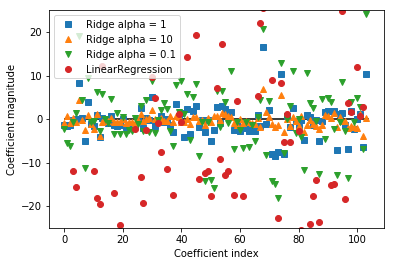

In [10]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## 学習曲線（learning curve）
モデルの性能をデータセットサイズの関数として示したもの。

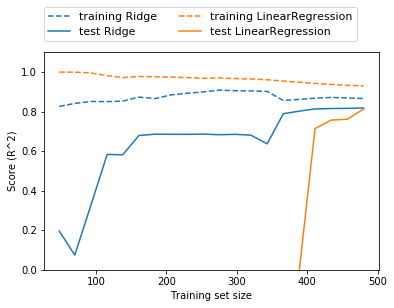

In [11]:
mglearn.plots.plot_ridge_n_samples()

# Lasso
正則化する。いくつかの係数を完全に0にし、モデルを解釈しやすくして、どの特徴量が重要なのかを明らかにする。

In [14]:
import numpy as np
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
# 訓練セットに対する性能
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
# テストセットに対する性能
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
# 使用された特徴量
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [17]:
# 係数を0に向かわせる強さを制御する正則化パラメータalphaを減らす（適合不足の度合いを減らす）
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)  # "max_iter"の値を増やさないと警告が発生する
# 訓練セットに対する性能
print(f"Training set score: {lasso001.score(X_train, y_train):.2f}")
# テストセットに対する性能
print(f"Test set score: {lasso001.score(X_test, y_test):.2f}")
# 使用された特徴量
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


alphaを小さくしすぎると、リッジの場合と同様に正則化の効果が薄れ、過剰適合が発生し、性能はLinearRegressionと似たようなものになる。

In [18]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
# 訓練セットに対する性能
print(f"Training set score: {lasso00001.score(X_train, y_train):.2f}")
# テストセットに対する性能
print(f"Test set score: {lasso00001.score(X_test, y_test):.2f}")
# 使用された特徴量
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


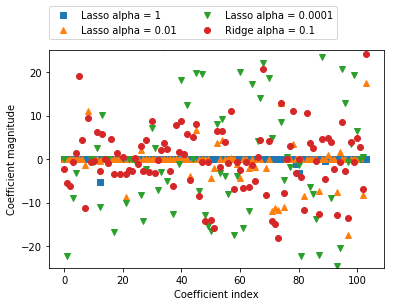

In [19]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol = 2, loc = (0, 1.05))

実際に使う場合には、この2つのうちではリッジ回帰をまずためしてみるとよい。しかし、特徴量がたくさんあって、そのうち重要なものはわずかしかないことが予測されるのであれば、Lassoのほうが向いている。